In [212]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import model_define as modef
import os

#%%
# -------------------load data----------------------------
class CustomNpyDataset(Dataset):
    def __init__(self,a=0,b=100,name=0):
        super(CustomNpyDataset, self).__init__()
        self.a = a
        self.b = b
        self.name = name

    def __len__(self):
        return self.b-self.a+1

    def __getitem__(self, idx):
        # print("__getitem__ called")
        data = f"Data from dataset{self.name} is {idx}"
        labels = idx
        return labels,data
    


# train_dataset = CustomNpyDataset("dataset/MNIST_processed/u0_train", "u0_train_", "dataset/MNIST_processed/label_train_all.npy")
train_dataset1 = CustomNpyDataset(0,3,1111)
train_loader1 = DataLoader(train_dataset1, batch_size=3, shuffle=True)

train_dataset2 = CustomNpyDataset(0,3,2222)
train_loader2 = DataLoader(train_dataset2, batch_size=3, shuffle=False)

for idx_enum,data_enum in enumerate(zip(train_loader1, train_loader2)):
    # print(idx_enum,'\n',data_enum,'\n--------------------')
    print("Batch from dataset1: ",data_enum[0],"\nBatch from dataset2: ",data_enum[1],'\n--------------------')
    # print("Batch from dataset1: \nlabels: ",data_enum[0][0], "     datas: ", data_enum[0][1],"\nBatch from dataset2: \nlabels: ",data_enum[1][0], "     datas: ", data_enum[1][1],'\n--------------------')
    for batch_labels,batch_data in zip(data_enum[0][0],data_enum[0][1]):
        print("Batch from dataset1: \nlabels: ",batch_labels, "     datas: ", batch_data)
    print('---------------')
    for batch_labels,batch_data in zip(data_enum[1][0],data_enum[1][1]):
        print("Batch from dataset2: \nlabels: ",batch_labels, "     datas: ", batch_data)
    print('-----------------------------------------')

    


Batch from dataset1:  [tensor([0, 1, 2]), ('Data from dataset1111 is 0', 'Data from dataset1111 is 1', 'Data from dataset1111 is 2')] 
Batch from dataset2:  [tensor([0, 1, 2]), ('Data from dataset2222 is 0', 'Data from dataset2222 is 1', 'Data from dataset2222 is 2')] 
--------------------
Batch from dataset1: 
labels:  tensor(0)      datas:  Data from dataset1111 is 0
Batch from dataset1: 
labels:  tensor(1)      datas:  Data from dataset1111 is 1
Batch from dataset1: 
labels:  tensor(2)      datas:  Data from dataset1111 is 2
---------------
Batch from dataset2: 
labels:  tensor(0)      datas:  Data from dataset2222 is 0
Batch from dataset2: 
labels:  tensor(1)      datas:  Data from dataset2222 is 1
Batch from dataset2: 
labels:  tensor(2)      datas:  Data from dataset2222 is 2
-----------------------------------------
Batch from dataset1:  [tensor([3]), ('Data from dataset1111 is 3',)] 
Batch from dataset2:  [tensor([3]), ('Data from dataset2222 is 3',)] 
--------------------
Batc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
sys_path =  ['d:\\OneDrive\\SUSTech\\MetaSurface_Lab\\Python Project\\D2NN_Simulation_COOPER', 'c:\\Users\\25460\\anaconda3\\envs\\default_deep_env\\python39.zip', 'c:\\Users\\25460\\anaconda3\\envs\\default_deep_env\\DLLs', 'c:\\Users\\25460\\anaconda3\\envs\\default_deep_env\\lib', 'c:\\Users\\25460\\anaconda3\\envs\\default_deep_env', '', 'c:\\Users\\25460\\anaconda3\\envs\\default_deep_env\\lib\\site-packages', 'c:\\Users\\25460\\anaconda3\\envs\\default_deep_env\\lib\\site-packages\\win32', 'c:\\Users\\25460\\anaconda3\\envs\\default_deep_env\\lib\\site-packages\\win32\\lib', 'c:\\Users\\25460\\anaconda3\\envs\\default_deep_env\\lib\\site-packages\\Pythonwin', 'D:\\OneDrive\\SUSTech\\MetaSurface_Lab\\Python Project\\D2NN_Simulation_COOPER\\Main_Model', 'D:\\OneDrive\\SUSTech\\MetaSurface_Lab\\Python Project\\D2NN_Simulation_COOPER\\Main_Model', 'D:\\OneDrive\\SUSTech\\MetaSurface_Lab\\Python Pr

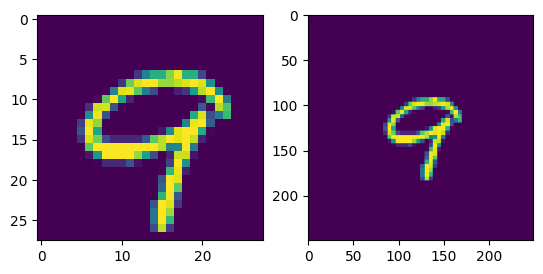

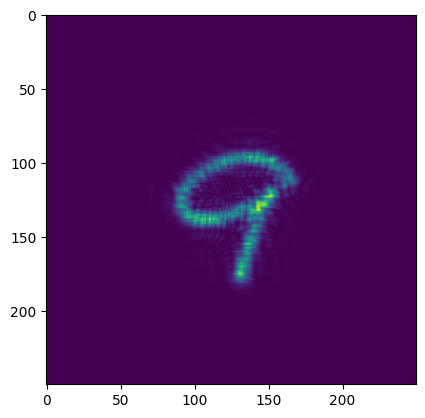

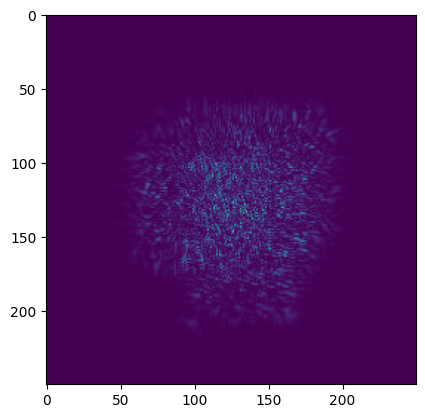

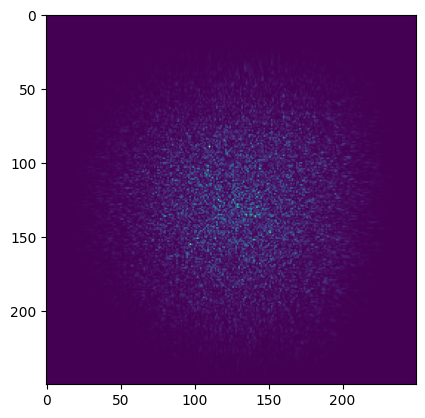

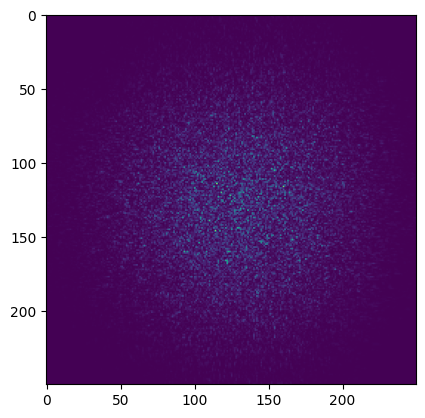

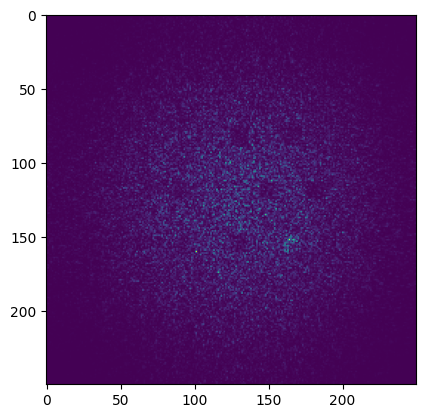

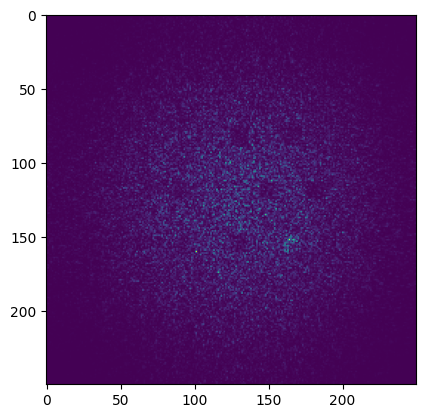

In [28]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import torch
import numpy as np

import sys
sys.path.append("D:\\OneDrive\\SUSTech\\MetaSurface_Lab\\Python Project\\D2NN_Simulation_COOPER\\Main_Model") 
print("sys_path = ",sys.path)
import Main_Model.model_define as modef

data_fashion = ['FASHION','fashion'] 
data_mnist = ['MNIST','mnist']
dataset_name = data_mnist


origin = np.load('dataset/'+dataset_name[0]+'/'+dataset_name[1]+'.npy', allow_pickle=True)
# [0][0] for train_data, [0][1] for train_label
# [1][0] for validation_data, [1][1] for validation_label
# [2][0] for test_data, [2][1] for test_label

origin_data = origin[1][0]
origin_label = origin[1][1]

label = np.load('dataset/'+dataset_name[0]+'_processed/label_validation_all.npy', allow_pickle=True)

data_dir = 'dataset/'+dataset_name[0]+'_processed/u0_validation'
data_file = 'u0_validation_'

idx = 6877
print("Label of ",idx," is ",label[:,idx])
print("Label of ",idx," is ",origin_label[idx])

# 测试所保存的模型
m_state_dict = torch.load('Main_Model/BD2NN_mnist_0_5_fashion_0_5_DEL_A_PROPA.pt')
D2NN = modef.OpticalNetwork(M=modef.M, L=modef.L, lmbda=modef.lmbda, z=modef.z).to(modef.device)
D2NN.load_state_dict(m_state_dict)
D2NN.eval()
print(D2NN)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(origin_data[idx,:,:])
plt.subplot(1, 2, 2)
plt.imshow(np.load(data_dir + "/" + data_file + "%d.npy"%idx, allow_pickle=True))
dataaa = torch.tensor(np.load(data_dir + "/" + data_file + "%d.npy"%idx, allow_pickle=True)).double().to(modef.device)
dataaa = dataaa.reshape(1, 250, 250)
with torch.no_grad():
    result = D2NN(dataaa, test=True, inverse=True)
print(result)

# plt.figure()
# plt.subplot(4, 2, 1)
# plt.imshow(np.load(data_dir + "/" + data_file + "%d.npy"%idx, allow_pickle=True))
# plt.subplot(4, 2, 2)
# plt.imshoworigin_data[idx,:,:]
# plt.subplot(4, 2, 3)
# plt.imshow(np.load(data_dir + "/" + data_file + "%d.npy"%(idx+1), allow_pickle=True))
# plt.subplot(4, 2, 4)
# plt.imshoworigin_data[idx+1,:,:]
# plt.subplot(4, 2, 5)
# plt.imshow(np.load(data_dir + "/" + data_file + "%d.npy"%(idx+2), allow_pickle=True))
# plt.subplot(4, 2, 6)
# plt.imshoworigin_data[idx+2,:,:]
# plt.subplot(4, 2, 7)
# plt.imshow(np.load(data_dir + "/" + data_file + "%d.npy"%(idx+3), allow_pickle=True))
# plt.subplot(4, 2, 8)
# plt.imshoworigin_data[idx+3,:,:]

In [35]:
import torch
import numpy as np

# value_output[] = torch.cat((values_temp, surrounding_intensity), 0)

a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])

a[:,2] = torch.tensor([10,11,12])

b = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

c = np.zeros((4,1))

torch.cat((b,c),1)

TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray